<a href="https://colab.research.google.com/github/IlYaSsBJ/Coding-Week/blob/main/hiba_Global_Model_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Training and Evaluating Random Forest...

Metrics for Random Forest:
Accuracy: 0.9551
Precision: 0.9556
Recall: 0.9551
F1-Score: 0.9553
ROC-AUC: 0.9974


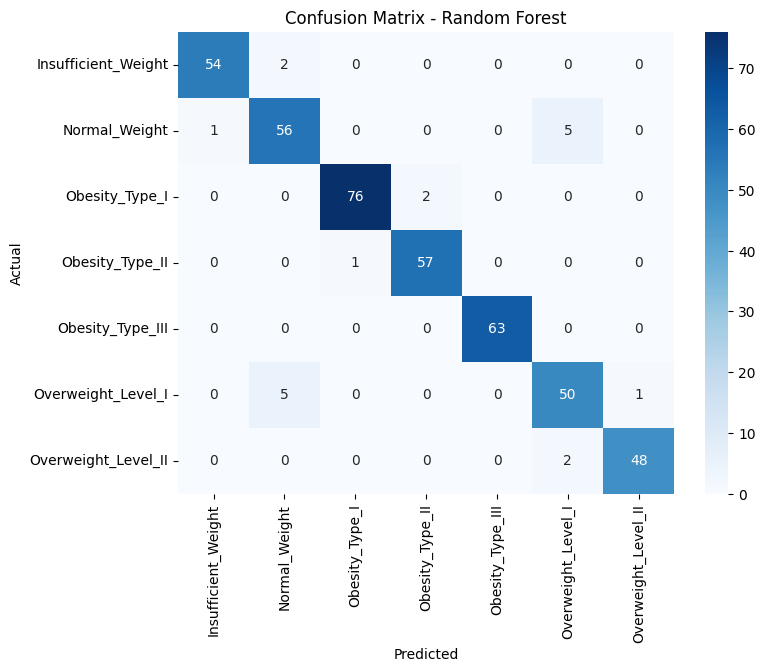


Classification Report for Random Forest:
                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.96      0.97        56
      Normal_Weight       0.89      0.90      0.90        62
     Obesity_Type_I       0.99      0.97      0.98        78
    Obesity_Type_II       0.97      0.98      0.97        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.88      0.89      0.88        56
Overweight_Level_II       0.98      0.96      0.97        50

           accuracy                           0.96       423
          macro avg       0.95      0.95      0.95       423
       weighted avg       0.96      0.96      0.96       423



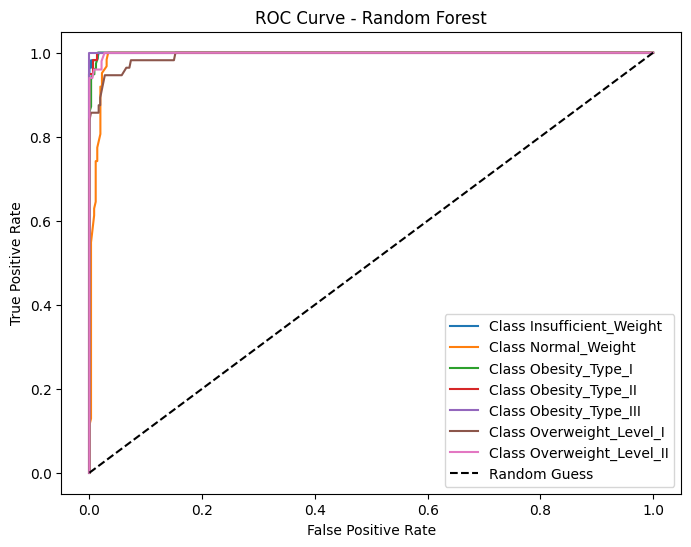

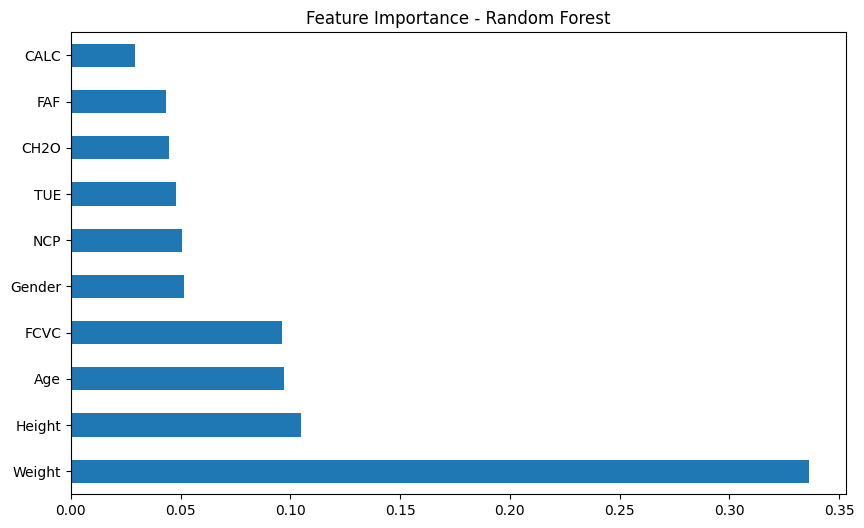


Training and Evaluating XGBoost...

Metrics for XGBoost:
Accuracy: 0.9622
Precision: 0.9627
Recall: 0.9622
F1-Score: 0.9621
ROC-AUC: 0.9989


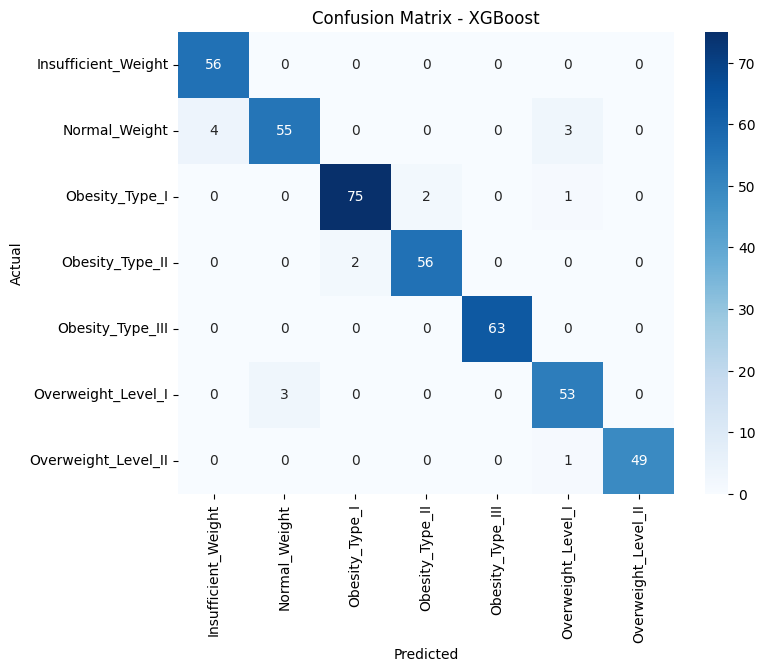


Classification Report for XGBoost:
                     precision    recall  f1-score   support

Insufficient_Weight       0.93      1.00      0.97        56
      Normal_Weight       0.95      0.89      0.92        62
     Obesity_Type_I       0.97      0.96      0.97        78
    Obesity_Type_II       0.97      0.97      0.97        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.91      0.95      0.93        56
Overweight_Level_II       1.00      0.98      0.99        50

           accuracy                           0.96       423
          macro avg       0.96      0.96      0.96       423
       weighted avg       0.96      0.96      0.96       423



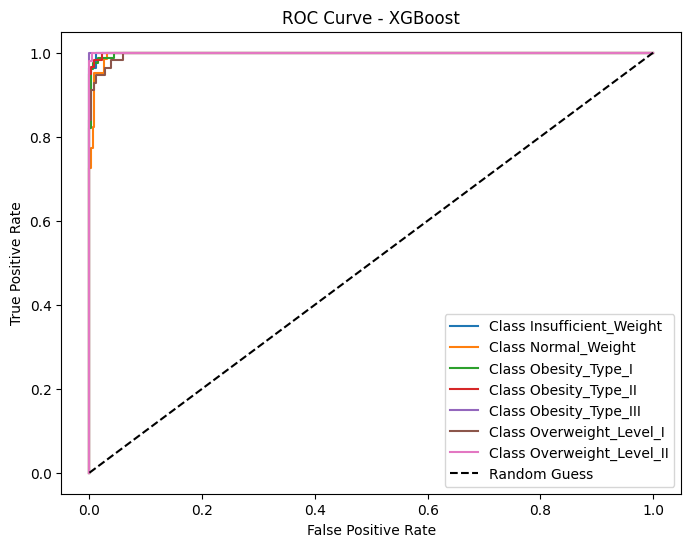

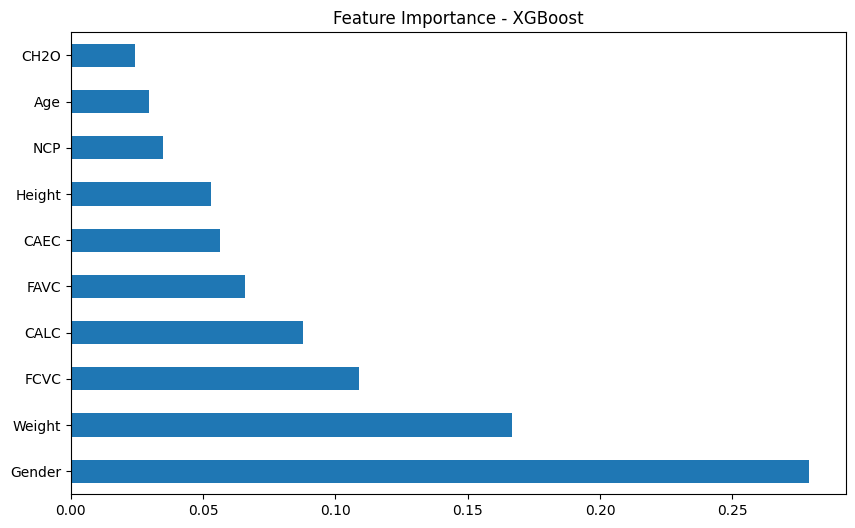

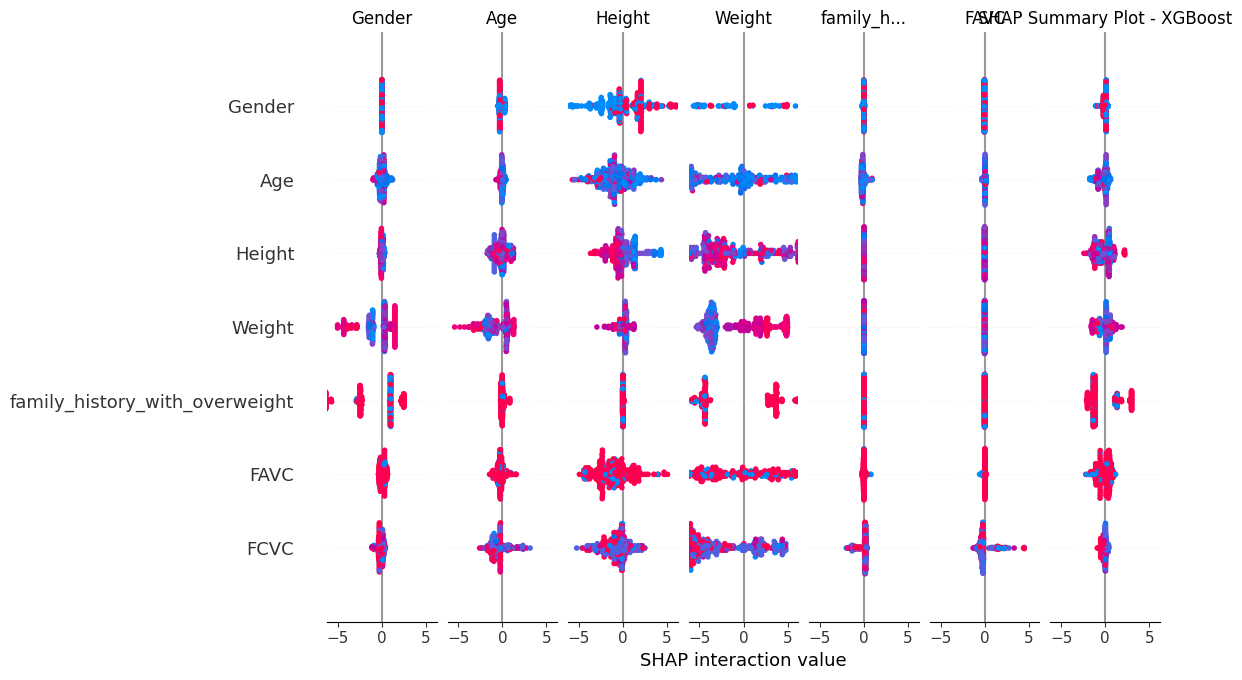


Training and Evaluating LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000399 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2063
[LightGBM] [Info] Number of data points in the train set: 1688, number of used features: 16
[LightGBM] [Info] Start training from score -2.056021
[LightGBM] [Info] Start training from score -2.015199
[LightGBM] [Info] Start training from score -1.821828
[LightGBM] [Info] Start training from score -1.954836
[LightGBM] [Info] Start training from score -1.866779
[LightGBM] [Info] Start training from score -1.975979
[LightGBM] [Info] Start training from score -1.950661
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

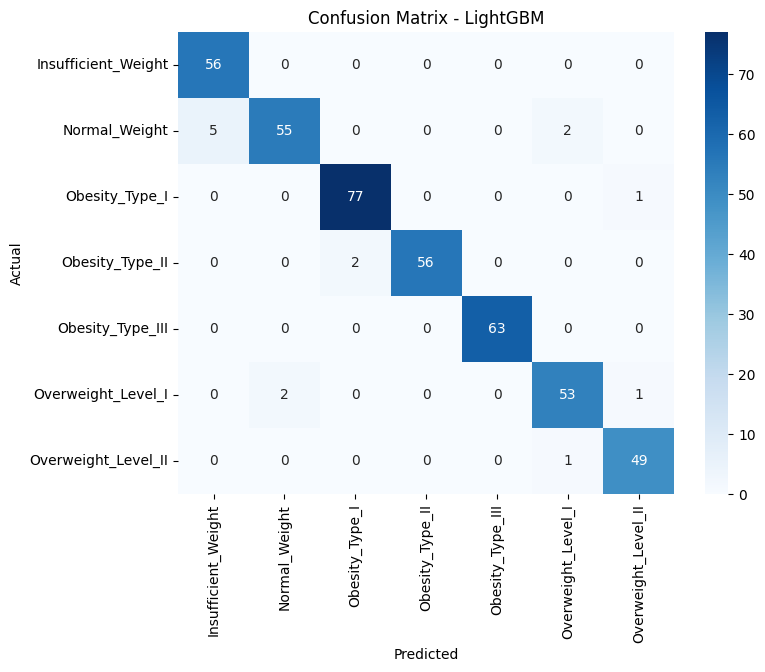


Classification Report for LightGBM:
                     precision    recall  f1-score   support

Insufficient_Weight       0.92      1.00      0.96        56
      Normal_Weight       0.96      0.89      0.92        62
     Obesity_Type_I       0.97      0.99      0.98        78
    Obesity_Type_II       1.00      0.97      0.98        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.95      0.95      0.95        56
Overweight_Level_II       0.96      0.98      0.97        50

           accuracy                           0.97       423
          macro avg       0.97      0.97      0.97       423
       weighted avg       0.97      0.97      0.97       423



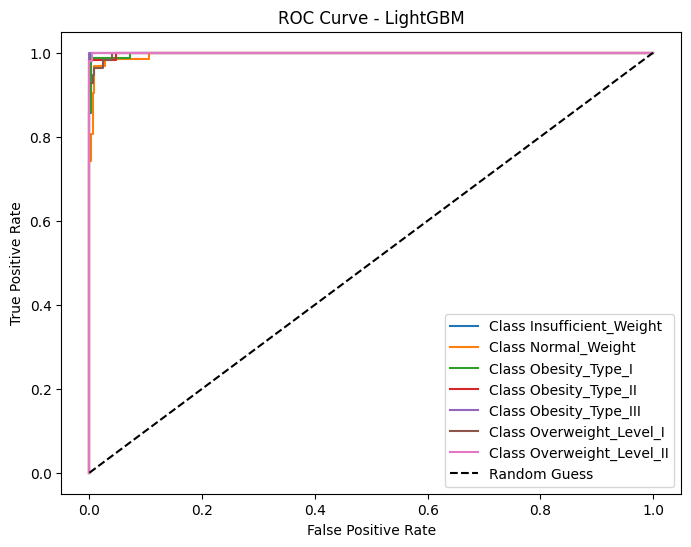

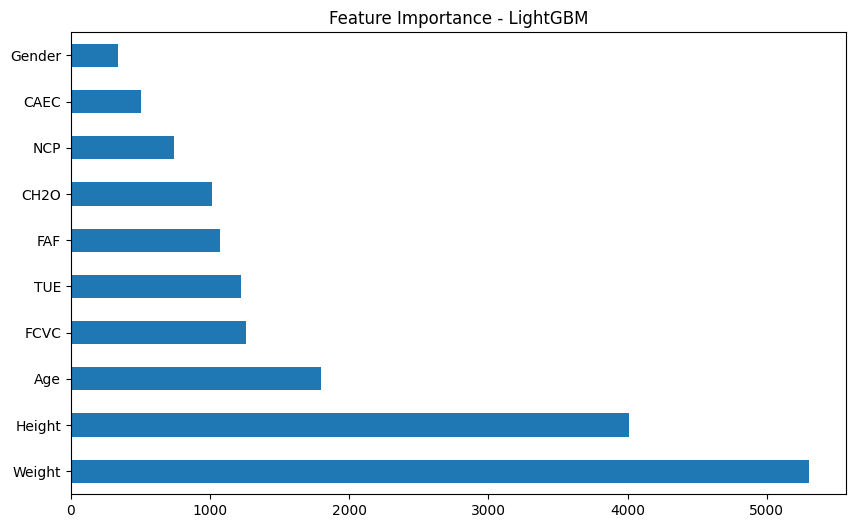


Training and Evaluating CatBoost...

Metrics for CatBoost:
Accuracy: 0.9622
Precision: 0.9629
Recall: 0.9622
F1-Score: 0.9621
ROC-AUC: 0.9991


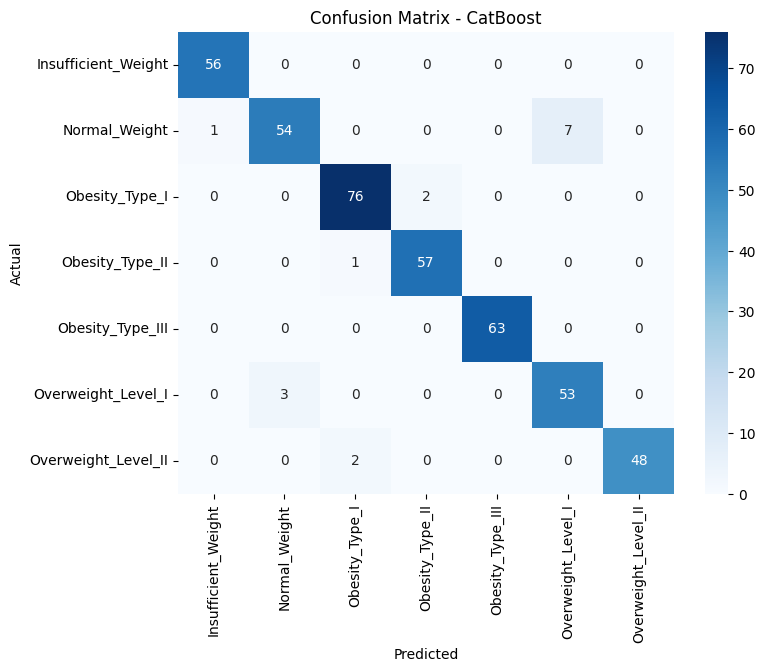


Classification Report for CatBoost:
                     precision    recall  f1-score   support

Insufficient_Weight       0.98      1.00      0.99        56
      Normal_Weight       0.95      0.87      0.91        62
     Obesity_Type_I       0.96      0.97      0.97        78
    Obesity_Type_II       0.97      0.98      0.97        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.88      0.95      0.91        56
Overweight_Level_II       1.00      0.96      0.98        50

           accuracy                           0.96       423
          macro avg       0.96      0.96      0.96       423
       weighted avg       0.96      0.96      0.96       423



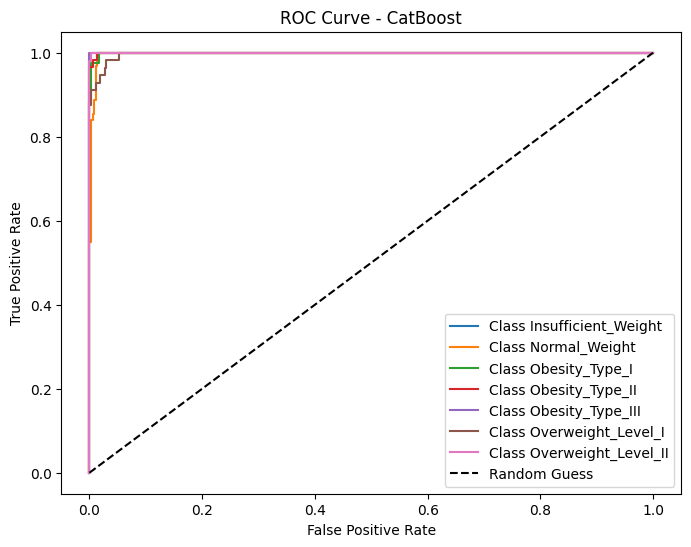

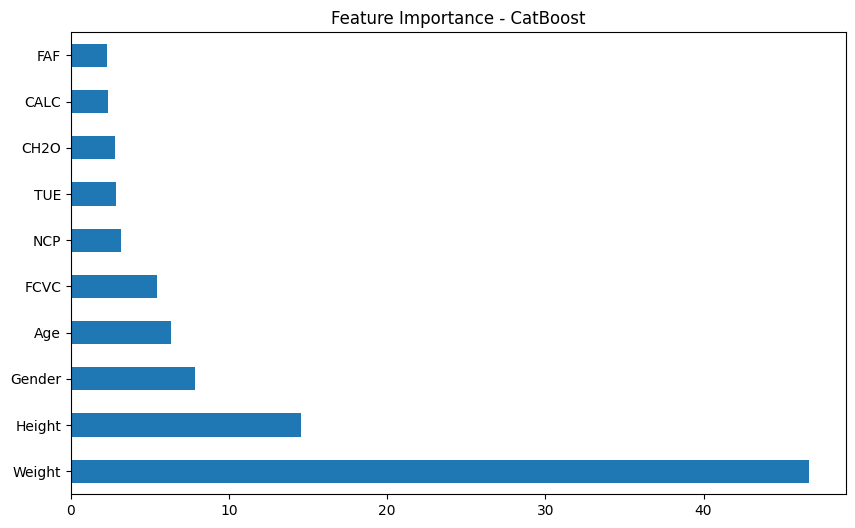

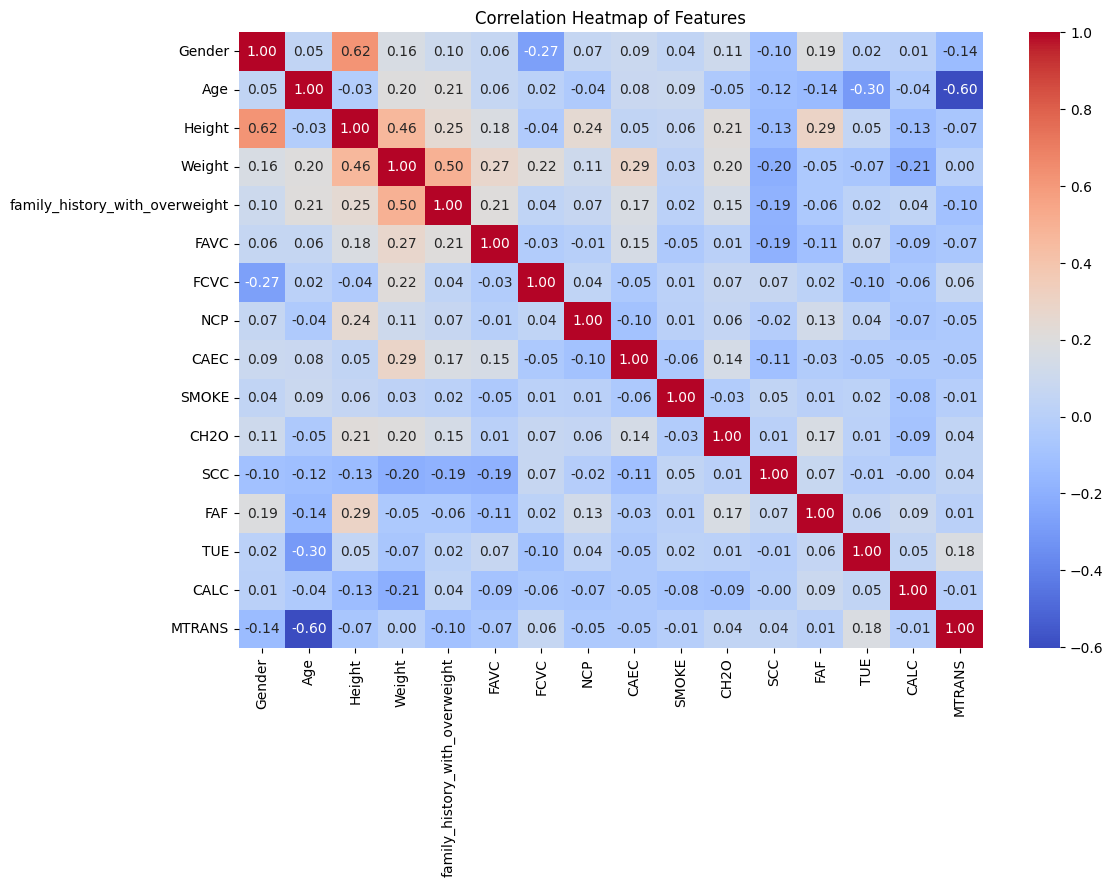

<ipython-input-3-63057079e970>:118: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=y, palette='viridis')


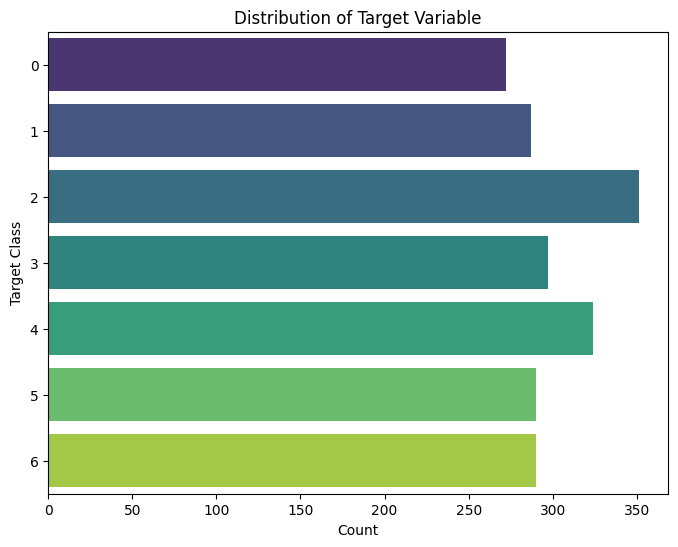

In [3]:
# Install the catboost library
!pip install catboost
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder
import shap

# Load the dataset
url = "https://raw.githubusercontent.com/IlYaSsBJ/Coding-Week/refs/heads/main/data/raw/ObesityDataSet.csv"
df = pd.read_csv(url)

# Encode categorical features
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features (X) and target (y)
X = df.drop(columns=['NObeyesdad'])  # Replace 'NObeyesdad' with your target column
y = df['NObeyesdad']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(random_state=42, verbose=0)  # Set verbose=0 to suppress output
}

# Evaluate each model and generate visualizations
for name, model in models.items():
    print(f"\nTraining and Evaluating {name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

    # Display metrics
    print(f"\nMetrics for {name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['NObeyesdad'].classes_, yticklabels=label_encoders['NObeyesdad'].classes_)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Classification Report
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred, target_names=label_encoders['NObeyesdad'].classes_))

    # ROC Curve
    plt.figure(figsize=(8, 6))
    for i in range(len(label_encoders['NObeyesdad'].classes_)):
        fpr, tpr, _ = roc_curve(y_test == i, y_pred_proba[:, i])
        plt.plot(fpr, tpr, label=f"Class {label_encoders['NObeyesdad'].classes_[i]}")
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {name}")
    plt.legend()
    plt.show()

    # Feature Importance (for tree-based models)
    if hasattr(model, 'feature_importances_'):
        plt.figure(figsize=(10, 6))
        feature_importances = pd.Series(model.feature_importances_, index=X.columns)
        feature_importances.nlargest(10).plot(kind='barh')
        plt.title(f"Feature Importance - {name}")
        plt.show()

    # SHAP Analysis (for XGBoost only)
    if name == "XGBoost":
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test)
        shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
        plt.title(f"SHAP Summary Plot - {name}")
        plt.show()

# Correlation Heatmap (for the entire dataset)
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Features")
plt.show()

# Distribution of Target Variable
plt.figure(figsize=(8, 6))
sns.countplot(y=y, palette='viridis')
plt.title("Distribution of Target Variable")
plt.xlabel("Count")
plt.ylabel("Target Class")
plt.show()